##### Alfatraining
Machine Learning Kurs
Abschlussprojekt

---

Dozent: Mathias

Author: Daniekl / Andres


# Projekt: Erkennung von Malaria-infizierten Zellen
 12. Oktober - 16. Oktober, 2020

### Projektbeschreibung
Während Malaria weltweit noch immer zu den weitverbreitesten Erkrankungen mit hoher
Sterblichkeit zählt, fehlen im Gesundheitswesen in Regionen mit geringer Prävalenz,
z.B. in Deutschland, oft Kenntnisse und Erfahrungswerte in der Diagonistik. Malaria
wird durch den einen einzelligen Organismus, den Plasmodium-Parasiten verursacht,
der im Zuge seines Fortpflanzungszyklus menschliche Zellen befällt. Malaria kann durch
Untersuchung von Blutproben der Patientinnen unter dem Lichtmikroskop diagnostiziert
werden, bei dem der Probe eine Färbemittel hinzugefugt wird, sodass der Parasit sichtbar
wird.

Ziel dieses Projektes ist es zu untersuchen, ob mit den Methoden des Machine Learning eine automatisierte Diagnostik der lichtmikroskopischen Bildaufnahmen möglich
ist. Betrachten Sie dazu den folgenden öffentlich verfugbaren Datensatz, der eine Samm-
lung von lichtmikroskopischen Aufnahmen von infizierten und gesunden Zellen enthält:
Malaria Cell Images.
Ihre Aufgabe ist es, eine Exploration des Datensatzes vorzunehmen und anschließend
mit einer geeigneten Methode ein Erkennungsmodell von infzierten Zellen zu erstellen.
Neben einem Modell sollen Sie auch eine Einschätzung der Generalisierungsfähigkeit
des Modells bereitstellen, sowie einen Bericht ausarbeiten, der Ihr Vorgehen und ihre
Entscheidungen dokumentiert.

### Aufgaben
1. **Datenexploration** Explorieren Sie die Daten auf eine in Ihren Augen geeignete
Weise. Folgende Aspekte könnten unter anderem dabei relevant sein:
> * Dateiformat(e), Anzahl der Datenpunkte
> * Qualitative Analyse und Visualisierung
> * Auflösung der Bilder, Bildformat, Farb- vs Graustufendarstellung
2. **Datenrepräsentation** Repräsentieren Sie die Daten auf eine fur Ihr Modell ge-
eignete Weise. Untersuchen Sie, welche Vorverarbeitungen sinnvoll oder nötig sind.
3. **Training** Trainieren Sie eines oder mehrere Modelle zur Vorhersage von infizierten
Zellen.
4. **Evaluation** Evaluieren Sie das Modell und schätzen Sie die Generalisierungsfähigkeit
des Modells.

### Ergebnisse
Einzureichen und vorzubereiten sind:
> * Code (Jupyter-Notebook)
> * Bericht (Jupyter-Notebook)
> * Präsentation (5-7 Minuten)

Die Ergebnisse Ihrer Untersuchungen sollten Sie in einem Bericht zusammenfassen. Dieser Bericht sollte sowohl Ihre Vorgehensweise als auch Ihren Code dokumentieren. Verwenden Sie dafur am besten ein Jupyter-Notebook, das Sie einmal als Notebook (.ipynb) und einmal als PDF einreichen.

Neben lesbarem und gut dokumentiertem Code sollten aus Ihrem Bericht auch Ihre
Entscheidungsprozesse hervorgehen. Dokumentieren Sie stets, fur welches Vorgehen Sie
sich entschieden haben und warum. Dazu geh¨ort zum Beispiel:
> * Welche Explorationen haben Sie vorgenommen und warum?
> * Haben Sie sämtliche Daten verwendet oder nur einen Teil? Warum oder warum
nicht?
> * War es nötig die Daten vorzuverarbeiten? Auf welche Weise? Warum oder warum
nicht? Wie hängt das mit dem Modell zusammen?
> * Für welches Modell haben Sie sich entschieden und warum? Handelt es sich bei dem
Problem um eine Regression oder Klassifikation? Welche Hyperparameter haben
Sie wie eingestellt und warum? Haben Sie mehrere Modelle getestet? Warum oder
warum nicht?
> * Auf welche Weise haben Sie die Generalisierung geschätzt? Welche Metrik haben
Sie verwendet? Welche Alternativen gibt es?

Präsentieren Sie anschließend Ihre Ergebnisse auf Grundlage Ihres Notebooks den anderen TeilnehmerInnen (5-7 Minuten Präsentationszeit). 

<span style="color:rgb(50,40,100)">***Notes about Procedure:*** Our first approach consisted in applying a PCA in order to reduce the dimensions of the model. This is helpful to realize how many components hold the most relevant information and how many eigenvectors are needed in order to reach a variance of 90%. The resulting set of eigenpictures was used to train a support vector classifier (SVC) using an rbf transformation and a logistic regression model.</span>

<span style="color:rgb(50,40,100)">The number of eigenvectors obtained was also taken as a sort of reference to caculate the number of required neurons in the first hidden layer. I fact, both PCA and linear neuronal approximation are different functions, but somehow both try to extract the key parameters in the dataset to perform a classification. The criterion used to calculate the number of neurons in the second hidden layer was to use a smaller number (ap. the half) than in the first layer.</span>

<span style="color:rgb(50,40,100)">For logistic regression an optimization was done using gridSearch. Additionally an L2 regularization was applied. For SVC, parameters C and solver were analized. The overall performace of the models was poor liying around 60% in accuracy.</span>

<span style="color:rgb(50,40,100)">As a final step, Neuronal networks were analyzed and tested. A regular fully connected network delivered also an accuracy of max. 60% by tunning the learning rate to 0.0006. The convolutional network delivered an accuracy of 94% without tunning. This is a convenient result regarding the fact that convolutional networks are strong agains overfitting. he high accuracy can be explained by the strukture of the CNN, in which the kernels (masks) detect small variations in the dataset. This is helpful in our case, where the standard deviation between images is relatively small i.e. pictures are very similar</span>

# Lösung

1. **Datenexploration** Explorieren Sie die Daten auf eine in Ihren Augen geeignete
Weise. Folgende Aspekte könnten unter anderem dabei relevant sein:
> * Dateiformat(e), Anzahl der Datenpunkte
> * Qualitative Analyse und Visualisierung
> * Auflösung der Bilder, Bildformat, Farb- vs Graustufendarstellung

<span style="color:rgb(0,100,100)">***Observations:*** the images present cells on a black background. Not every image has the same resolution. The concentration of the fluorescent marker in the probes makes them look pink (light purple, light gray and light orange are also possible colors). In an infected cell, the marker highlights the parasite with a darker color. In the uninfected cells, there is no parasite highlighted. However, some healthy cells present features which allow irregular concentrations of the marker, which may lead to think they are infected. Moreover, in the group of parasitized cells, some cells have a sparse concentration of the marker around the parasite, which makes them look healthy-like.</span>

<span style="color:rgb(0,100,100)">The images are mostly centered and a neuronal network may be used to classify the cells into unparasitized or parasitized. The images have also to be formatted in order to remove color information and work only with light intensities (grayscale). The resolution of the images have to be equalized in order to use a congruent amount of input neurons.</span>

2. **Datenrepräsentation** Repräsentieren Sie die Daten auf eine fur Ihr Modell ge-
eignete Weise. Untersuchen Sie, welche Vorverarbeitungen sinnvoll oder nötig sind.

In [4]:
## import libraries
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageOps

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.svm import SVC

%matplotlib inline

pcells_path = "cell_images/Parasitized/"
unpcells_path = "cell_images/Uninfected/"

***a) Creating data sets***

In [5]:
## load all file names for infected cells in an array
pcells=[]
for filename in os.listdir(pcells_path):
        pcells.append(filename)
pcells.remove(".DS_Store")
pcells.pop()
pcells=np.array(pcells)

## load all file names for healthy cells in an array
unpcells=[]
for filename in os.listdir(unpcells_path):
        unpcells.append(filename)
unpcells.remove(".DS_Store")
unpcells.pop()
unpcells=np.array(unpcells)

## find max and min image sizee
psize=[]
for cell_name in pcells:
    psize.append(Image.open(pcells_path + cell_name).size)

size=np.array(psize)

psample_max_width=np.max(size[:,0])
psample_max_height=np.max(size[:,1])

psample_min_width=np.min(size[:,0])
psample_min_height=np.min(size[:,1])

unp_size=[]
for cell_name in unpcells:
    unp_size.append(Image.open(unpcells_path + cell_name).size)

size=np.array(unp_size)

unp_sample_max_width=np.max(size[:,0])
unp_sample_max_height=np.max(size[:,1])

unp_sample_min_width=np.min(size[:,0])
unp_sample_min_height=np.min(size[:,1])

print("p_max width: ",psample_max_width)
print("p_max height: ",psample_max_height)
print("p_min width: ",psample_min_width)
print("p_min height: ",psample_min_height)

print("unp_max width: ",unp_sample_max_width)
print("unp_max height: ",unp_sample_max_height)
print("unp_min width: ",unp_sample_min_width)
print("unp_min height: ",unp_sample_min_height)

p_max width:  394
p_max height:  385
p_min width:  46
p_min height:  40
unp_max width:  247
unp_max height:  235
unp_min width:  49
unp_min height:  49


In [6]:
sample_width=80
sample_height=80

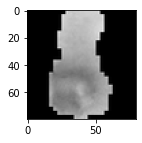

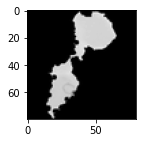

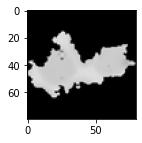

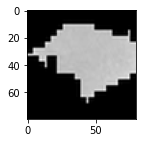

In [7]:
samples=[]

## resize all images to new standard size

for cell_name in pcells:
    img= Image.open(pcells_path + cell_name)
    
    if (img.size[0]<img.size[1]):
        delta_w = img.size[1] - img.size[0]
        delta_h = 0
    else:
        delta_w = 0
        delta_h = img.size[0] - img.size[1]
    
    padding = (np.abs(delta_w//2),np.abs(delta_h//2),np.abs(delta_w-(delta_w//2)),np.abs(delta_h-(delta_h//2)))
    im = ImageOps.expand(img, padding,0)
    im = im.resize((sample_width,sample_height),Image.ANTIALIAS)
    
    im = ImageOps.grayscale(im)
    
    # create a new image and paste the resized on it
    im2 = Image.new("L", (sample_width, sample_height))
    im2.paste(im,(0,0))
    
    if (img.size[0]==psample_max_width) or (img.size[1]==psample_max_height) or (img.size[0]==psample_min_width) or (img.size[1]==psample_min_height):
        plt.figure(figsize=(2,2))
        plt.imshow(im2, cmap="gray")   
    
    samples.append(tuple((np.asarray(im2),1)))
    img.close()

for cell_name in unpcells:
    img= Image.open(unpcells_path + cell_name)
    if (img.size[0]<img.size[1]):
        delta_w = img.size[1] - img.size[0]
        delta_h = 0
    else:
        delta_w = 0
        delta_h = img.size[0] - img.size[1]
    
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    im = ImageOps.expand(img, padding)
    im = im.resize((sample_width,sample_height),Image.ANTIALIAS)
    
    im = ImageOps.grayscale(im)

    # create a new image and paste the resized on it
    im2 = Image.new("L", (sample_width, sample_height))
    im2.paste(im, (0,0))
    samples.append(tuple((np.asarray(im2),0)))
    img.close()
    
samples=np.array(samples)

In [8]:
X=samples[:,0]
y=samples[:,1]

In [9]:
#shuffle array of infected and healthty cells
X, y = shuffle(X, y, random_state=0)

(27556,)
(80, 80)


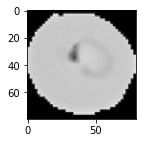

In [10]:
#visualize one element
print(X.shape)
print(X[0].shape)
im = Image.fromarray(np.uint8(X[0]))

plt.figure(figsize=(2,2))
plt.imshow(im, cmap="gray")

In [11]:
data = []

for i in range(len(X)):
    m=np.array(X[i])
    m=m.reshape((1,sample_width*sample_height))
    data.append(m)
    
data = np.array(data).squeeze()

X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y, train_size=0.8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22044, 6400)
(22044,)
(5512, 6400)
(5512,)


In [12]:
data.shape

## prepare a PCA
pca_reduce = PCA(n_components=0.9)
pca_reduce.fit(X_train)

PCA(n_components=0.9)

In [13]:
X_train_transformed = pca_reduce.transform(X_train)
X_test_transformed = pca_reduce.transform(X_test)

print(pca_reduce.components_.shape)

(269, 6400)


Text(0.5, 1.0, 'cumulative variance')

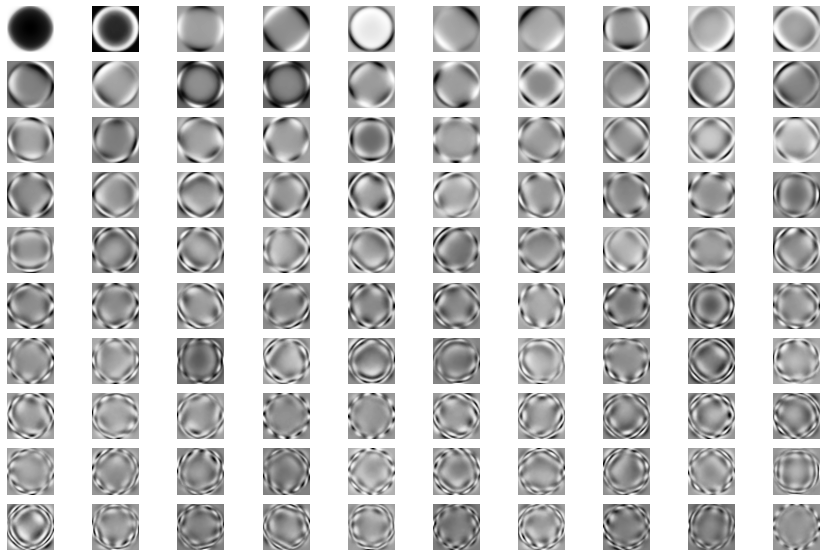

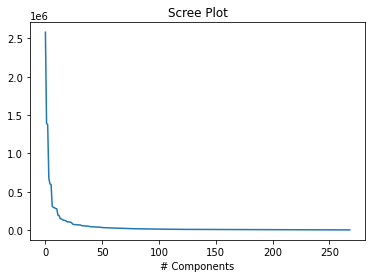

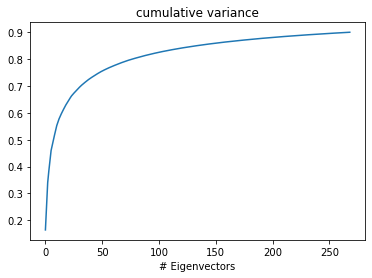

In [14]:
##display eigenpictures of the reduced system
fig, axes = plt.subplots(10, 10, figsize=(15, 10))

for i, ax in enumerate(axes.flatten()):
    if i==0:
        component = pca_reduce.mean_   
    else:
        component = pca_reduce.components_[i-1, :]
    ax.imshow(component.reshape(sample_width, sample_height), cmap="Greys")
    ax.axis("off")
    
plt.figure()
plt.plot(pca_reduce.explained_variance_)
plt.xlabel("# Components")
plt.title("Scree Plot")

plt.figure()
plt.plot(np.cumsum(pca_reduce.explained_variance_ratio_))
plt.xlabel("# Eigenvectors")
plt.title("cumulative variance")

## SVC Klassifier

In [15]:
svm_pca = SVC(kernel="rbf", gamma="scale", C=6)

svm_pca.fit(X_train_transformed, y_train.astype(int))

SVC(C=6)

In [16]:
svm_pca.score(X_test_transformed, y_test.astype(int))

0.7053701015965167

## Logistische Regression mit PCA + GridSearch

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {
    'penalty':["l2"], #"l1",
    'C': [10e-4, 10e-3, 10e-2, 10e-1, 1.0] ,
    'solver': [ 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [19]:
def make_logistic_regression(C=0.001, solver="lbfgs", penalty='l2'):

    log_model = LogisticRegression(C=C, solver=solver , penalty=penalty, random_state=10, max_iter=200)

    return log_model

In [20]:
meta_model_hp_tuning = GridSearchCV(
    make_logistic_regression(),
    param_grid=param_grid,
)

In [22]:
meta_model_hp_tuning.fit(X_train_transformed, y_train.astype(int))

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding er

GridSearchCV(estimator=LogisticRegression(C=0.001, max_iter=200,
                                          random_state=10),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 1.0], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']})

In [23]:
meta_model_hp_tuning.best_score_

0.6603617662107577

In [24]:
meta_model_hp_tuning.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [25]:
from sklearn.model_selection import cross_val_score

train_score = np.mean(cross_val_score(meta_model_hp_tuning, X_train_transformed, y_train.astype(int)))

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding er

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py

In [26]:
train_score

0.659953510370431

## Generalisierung 

In [27]:
best_poly_regression = meta_model_hp_tuning.best_estimator_

In [28]:
best_poly_regression

LogisticRegression(C=0.001, max_iter=200, random_state=10, solver='newton-cg')

In [29]:
y_test_pred = best_poly_regression.predict(X_test_transformed)

In [30]:
accuracy_test = (y_test_pred == y_test).mean()
accuracy_test

0.6551161103047896

## Prediction using NNs

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self, in_features=sample_width*sample_height):
        super(SimpleNet, self).__init__()

        self.layer1 = nn.Linear(in_features=in_features, out_features=270)
        self.layer2 = nn.Linear(in_features=270, out_features=80)
        self.layer3 = nn.Linear(in_features=80, out_features=2)

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        return x

In [33]:
y_train= y_train.astype(np.float64)
y_test= y_test.astype(np.float64)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).long()

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=1000)

In [34]:
import torch.optim as optim

# Netzwerk instanziieren
net = SimpleNet()

# Verlustfunktion
criterion = nn.CrossEntropyLoss()

# Optimierer
optimizer = optim.Adam(net.parameters(), lr=0.0006)

In [35]:
losses=[]
epochs=5
x_axe = np.linspace(0,len(trainloader),6*epochs)

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, batch in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch

        # zero the parameter gradients
        optimizer.zero_grad()

        ### forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            losses.append(running_loss/100)
            running_loss = 0.0
print('Finished Training')

[1,   100] loss: 8.147
[1,   200] loss: 4.060
[1,   300] loss: 2.064
[1,   400] loss: 1.771
[1,   500] loss: 1.183
[1,   600] loss: 1.259
[2,   100] loss: 0.762
[2,   200] loss: 0.802
[2,   300] loss: 0.762
[2,   400] loss: 0.809
[2,   500] loss: 0.718
[2,   600] loss: 0.692
[3,   100] loss: 0.715
[3,   200] loss: 0.692
[3,   300] loss: 0.690
[3,   400] loss: 0.749
[3,   500] loss: 0.714
[3,   600] loss: 0.699
[4,   100] loss: 0.670
[4,   200] loss: 0.672
[4,   300] loss: 0.677
[4,   400] loss: 0.670
[4,   500] loss: 0.678
[4,   600] loss: 0.667
[5,   100] loss: 0.669
[5,   200] loss: 0.679
[5,   300] loss: 0.692
[5,   400] loss: 0.688
[5,   500] loss: 0.681
[5,   600] loss: 0.673
Finished Training


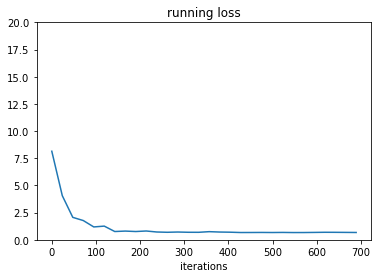

In [36]:
plt.figure()
plt.ylim(0,20)
plt.xlabel("iterations")
plt.title("running loss")
plt.plot(x_axe,losses)

In [37]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


lr:  1e-06
Accuracy of the network on the 10000 test images: 59 %
lr:  2.782559402207126e-06
Accuracy of the network on the 10000 test images: 60 %
lr:  7.742636826811277e-06
Accuracy of the network on the 10000 test images: 59 %
lr:  2.1544346900318823e-05
Accuracy of the network on the 10000 test images: 54 %
lr:  5.994842503189409e-05
Accuracy of the network on the 10000 test images: 60 %
lr:  0.0001668100537200059
Accuracy of the network on the 10000 test images: 59 %
lr:  0.00046415888336127773
Accuracy of the network on the 10000 test images: 49 %
lr:  0.0012915496650148827
Accuracy of the network on the 10000 test images: 49 %
lr:  0.003593813663804626
Accuracy of the network on the 10000 test images: 50 %
lr:  0.01
Accuracy of the network on the 10000 test images: 50 %


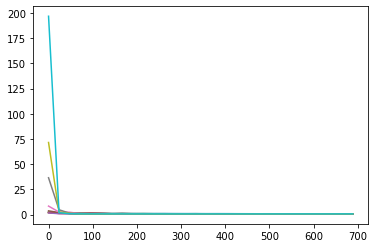

In [38]:
import torch.optim as optim

epochs=5
learn_rates=np.logspace(-6,-2,10)
x_axe = np.linspace(0,len(trainloader),6*epochs) 

plt.figure()

for lrate in learn_rates:
    print("lr: ",lrate)
    
    losses=[]
    
    # Netzwerk instanziieren
    net = SimpleNet()

    # Verlustfunktion
    criterion = nn.CrossEntropyLoss()

    # Optimierer
    optimizer = optim.Adam(net.parameters(), lr=lrate)
    
    for epoch in range(epochs):  # loop over the dataset multiple times

        running_loss = 0.0

        for i, batch in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = batch

            # zero the parameter gradients
            optimizer.zero_grad()

            ### forward + backward + optimize

            # forward
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            # backward
            loss.backward()
            # optimize
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 100 == 99:    # print every 100 mini-batches
                #print('[%d, %5d] loss: %.3f' %
                #      (epoch + 1, i + 1, running_loss / 100))
                losses.append(running_loss/100)
                running_loss = 0.0
    #print('Finished Training')
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))
    plt.plot(x_axe,losses, label=0)

***prediction using CNNs***

In [39]:
import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 24, 5)
        self.pool3 = nn.MaxPool2d(2, 2)  
        self.fc1 = nn.Linear(24 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.view(-1, 24 * 7 * 7)  # ähnlich wie reshape
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


conv_net = ConvNet()

In [40]:
X_train.shape

(22044, 6400)

In [41]:
X_train = X_train.reshape(X_train.shape[0], 1, sample_width, sample_height)
X_test = X_test.reshape(X_test.shape[0], 1, sample_width, sample_height)

In [42]:
y_train= y_train.astype(np.float64)
y_test= y_test.astype(np.float64)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).long()

trainset = TensorDataset(X_train_tensor, y_train_tensor)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

testset = TensorDataset(X_test_tensor, y_test_tensor)
testloader = DataLoader(testset, batch_size=1000)

In [43]:
import torch.optim as optim

conv_net = ConvNet()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(conv_net.parameters(), lr=0.001)

In [44]:
losses=[]
epochs=5
x_axe = np.linspace(0,len(trainloader),6*epochs)

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, batch in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch

        # zero the parameter gradients
        optimizer.zero_grad()

        ### forward + backward + optimize

        # forward
        outputs = conv_net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            losses.append(running_loss/100)
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.684
[1,   200] loss: 0.473
[1,   300] loss: 0.296
[1,   400] loss: 0.228
[1,   500] loss: 0.182
[1,   600] loss: 0.203
[2,   100] loss: 0.159
[2,   200] loss: 0.172
[2,   300] loss: 0.178
[2,   400] loss: 0.176
[2,   500] loss: 0.160
[2,   600] loss: 0.144
[3,   100] loss: 0.138
[3,   200] loss: 0.146
[3,   300] loss: 0.132
[3,   400] loss: 0.145
[3,   500] loss: 0.140
[3,   600] loss: 0.150
[4,   100] loss: 0.124
[4,   200] loss: 0.126
[4,   300] loss: 0.167
[4,   400] loss: 0.130
[4,   500] loss: 0.135
[4,   600] loss: 0.148
[5,   100] loss: 0.120
[5,   200] loss: 0.113
[5,   300] loss: 0.127
[5,   400] loss: 0.120
[5,   500] loss: 0.114
[5,   600] loss: 0.129
Finished Training


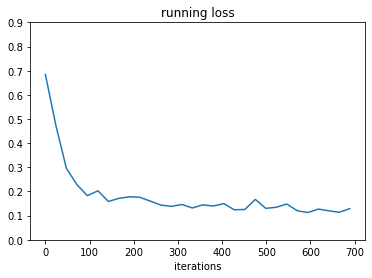

In [45]:
plt.figure()
plt.ylim(0,0.9)
plt.xlabel("iterations")
plt.title("running loss")
plt.plot(x_axe,losses)

In [46]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = conv_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %
